In [ ]:
# Plot based on data_set, method, num_clusters, and month;
#
# Parameters are as follows:
#     data_set: Irish_2010, London_2013
#     method: hierarchical/[dist], kmeans
#     num_clusters: 1 - 10
#     month: 1 - 12

In [2]:
# Plot preparation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

20,25,5,3 for cluster 9

12,8,2,2 for cluster 4

## Plot (point)

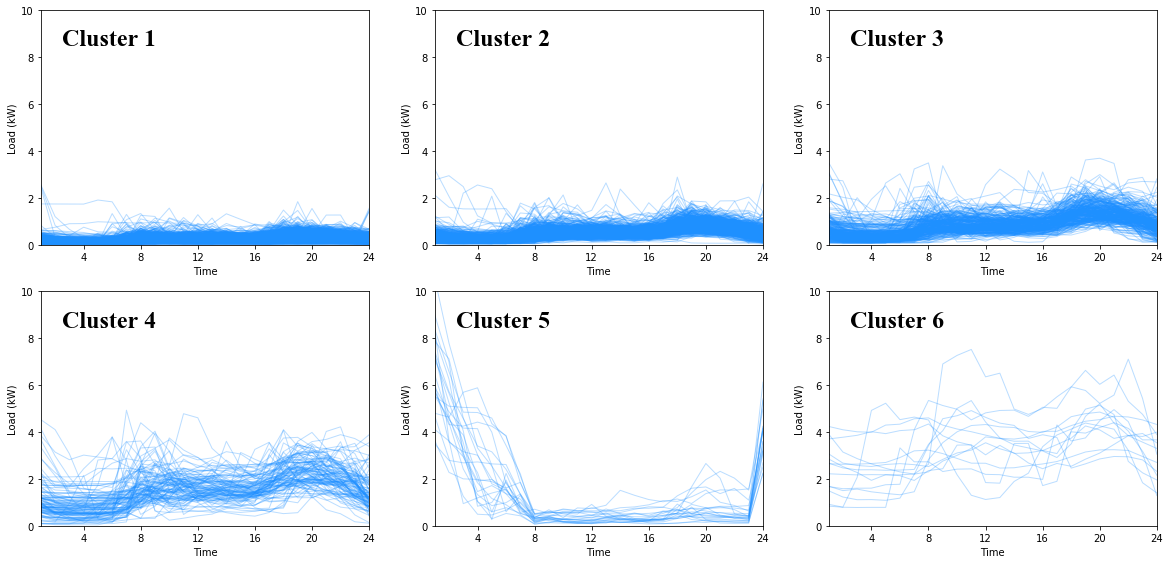

In [203]:
data_set = 'London_2013'
# method = 'hierarchical/cityblock'
method = 'kmeans'
num_clusters = 6
month = 2

index = np.zeros((10, 5))
id_list = [[],[],[],[],[],[]]

attr = pd.read_csv('../data/' + data_set + '_attr_final.csv')
labels = pd.read_csv('../result/' + data_set + '/clustering/point/' + method + '/n_clusters_' + str(num_clusters) + '.csv', header=None)
# labels = pd.read_csv('../result/' + data_set + '/clustering/point/' + method + '/n_clusters_' + str(num_clusters) + '_acorn.csv', header=None)

# clusters = [5,2,0,1,4,3]
clusters = [3,0,2,1,4,5]
l = 0

plt.figure(figsize=(20,25))
# for k in range(num_clusters):
for k in clusters:
    l = l+1
    plt.subplot(5, 3, l)
    for i in range(len(attr)):
        id = attr['ID'][i]
        df = pd.read_csv('../data/' + data_set + '_profiles/' + str(id) + '.csv', header=None).values
        if labels[month-1][i] == k:
#             index[k, attr['Cate'][i]-1] = index[k, attr['Cate'][i]-1] + 1    # 社会类型标签
            id_list[l-1].append(id)
            plt.plot(list(range(1, 25)), df[month-1], alpha=0.3, color='dodgerblue', linewidth=1)

    # Plot Parameters
    plt.xlabel('Time')
    plt.ylabel('Load (kW)')
    new_ticks = np.floor(np.linspace(0, 24, 7))
    plt.xticks(new_ticks)
    plt.xlim(1, 24)
    plt.ylim(0, 10)
    text = 'Cluster %d' %(l)
    plt.text(2.5, 8.5, text, fontdict={'size': 24, 'family': 'Times New Roman', 'color': 'black'})

point_id_list = id_list.copy()
plt.savefig('point_' + data_set + '_' + method.replace('/', '_') + '_' + str(num_clusters) + '_' + str(month) + '.svg', bbox_inches='tight', pad_inches=0)

## Plot (interval)

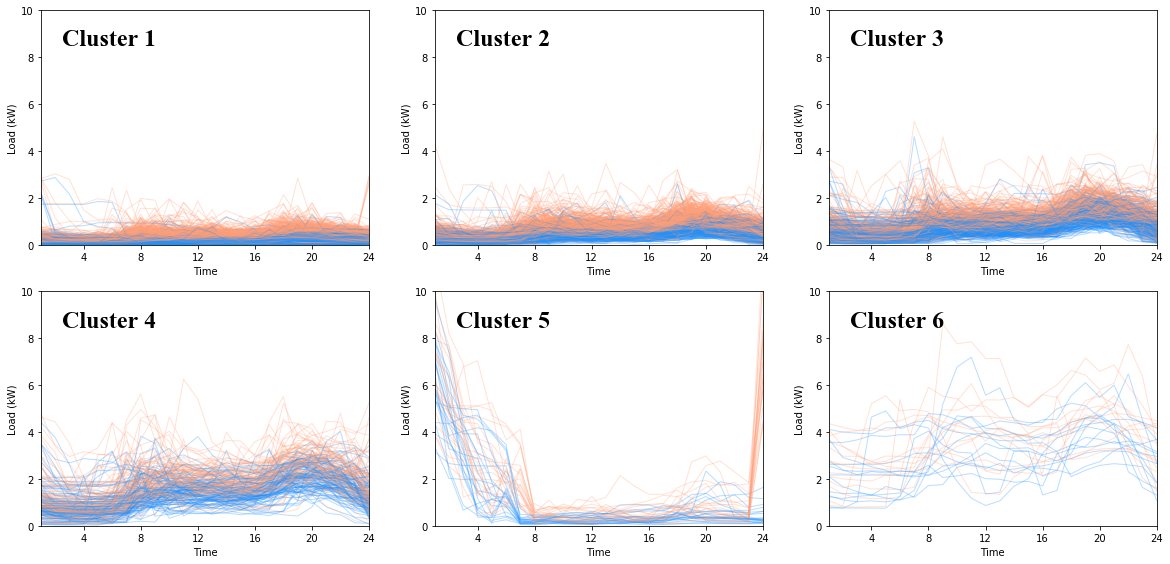

In [202]:
data_set = 'London_2013'
# method = 'hierarchical/cityblock'
method = 'kmeans'
num_clusters = 6
month = 2

id_list = [[],[],[],[],[],[]]

attr = pd.read_csv('../data/' + data_set + '_attr_final.csv')
labels = pd.read_csv('../result/' + data_set + '/clustering/interval/' + method + '/n_clusters_' + str(num_clusters) + '.csv', header=None)

# clusters = [1,5,4,0,3,2]
clusters = [3,0,5,2,4,1]
l = 0

# Plot
plt.figure(figsize=(20,25))
# for k in range(num_clusters):
for k in clusters:
    l = l + 1
    plt.subplot(5, 3, l)
    for i in range(len(attr)):
        id = attr['ID'][i]
        df = pd.read_csv('../data/' + data_set + '_profiles_interval/' + str(id) + '.csv', header=None).values
        if labels[month-1][i] == k:
            id_list[l-1].append(id)
            plt.plot(list(range(1, 25)), df[month*2-2], alpha=0.3, color='dodgerblue', linewidth=1)
            plt.plot(list(range(1, 25)), df[month*2-1], alpha=0.3, color='lightsalmon', linewidth=1)

    # Plot Parameters
    plt.xlabel('Time')
    plt.ylabel('Load (kW)')
    new_ticks = np.floor(np.linspace(0, 24, 7))
    plt.xticks(new_ticks)
    plt.xlim(1, 24)
    plt.ylim(0, 10)
    text = 'Cluster %d' %(l)
    plt.text(2.5, 8.5, text, fontdict={'size': 24, 'family': 'Times New Roman', 'color': 'black'})

interval_id_list = id_list.copy()
plt.savefig('interval_' + data_set + '_' + method.replace('/', '_') + '_' + str(num_clusters) + '_' + str(month) + '.svg', bbox_inches='tight', pad_inches=0)

## Compare

In [201]:
c = 5
point = np.array(point_id_list[c])
interval = np.array(interval_id_list[c])
both = np.intersect1d(point, interval)
print(len(point))
print(len(interval))
print(len(both))

13
13
13


In [192]:
point_percent = len(both) / len(point)
print(point_percent)
interval_percent = len(both) / len(interval)
print(interval_percent)

1.0
1.0


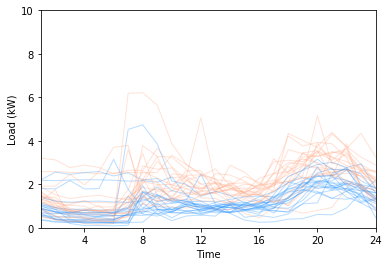

In [176]:
for i in point:
    if i not in both:
#         print(i)
#         df = pd.read_csv('../data/' + data_set + '_profiles/' + str(i) + '.csv', header=None).values
        df = pd.read_csv('../data/' + data_set + '_profiles_interval/' + str(i) + '.csv', header=None).values
        plt.plot(list(range(1, 25)), df[month*2-2], alpha=0.3, color='dodgerblue', linewidth=1)
        plt.plot(list(range(1, 25)), df[month*2-1], alpha=0.3, color='lightsalmon', linewidth=1)
#         plt.plot(list(range(1, 25)), df[month-1], alpha=0.3, color='dodgerblue', linewidth=1)
        plt.xlabel('Time')
        plt.ylabel('Load (kW)')
        new_ticks = np.floor(np.linspace(0, 24, 7))
        plt.xticks(new_ticks)
        plt.xlim(1, 24)
        plt.ylim(0, 10)

# plt.savefig('interval.svg', bbox_inches='tight', pad_inches=0)

In [168]:
labels = pd.read_csv('../result/' + data_set + '/clustering/point/' + method + '/n_clusters_' + str(num_clusters) + '.csv', header=None)
# labels = pd.read_csv('../result/' + data_set + '/clustering/interval/' + method + '/n_clusters_' + str(num_clusters) + '.csv', header=None)

In [158]:
attr[attr['ID'] == 1074]

,ID,Code,Residential - Tariff allocation,Residential - stimulus allocation,SME allocation
11,1074,1,E,E,NaN


In [169]:
labels[month-1][attr[attr['ID'] == 7441].index[0]]

2

## Plot Acorn groups

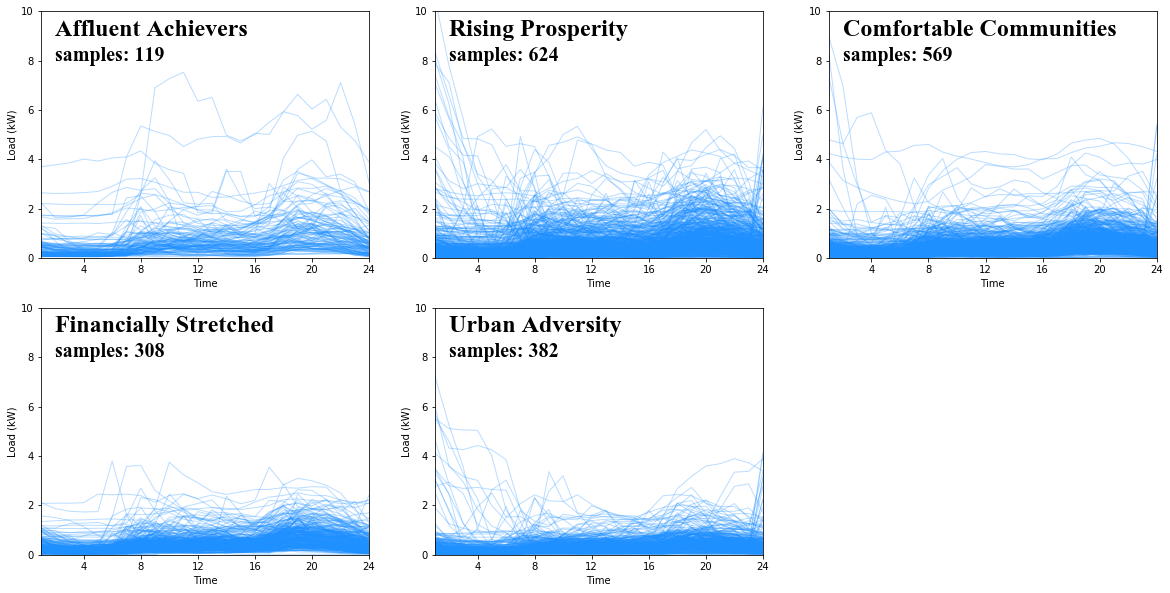

In [5]:
# Plot (according to Acorn groups)
month = 2
data_set = 'London_2013'
category = ['Affluent Achievers', 'Rising Prosperity', 'Comfortable Communities', 'Financially Stretched', 'Urban Adversity']
num = [119,624,569,308,382]

attr = pd.read_csv('../data/' + data_set + '_attr_final.csv')


plt.figure(figsize=(20,10))
for k in range(5):
    plt.subplot(2, 3, k+1)
    for i in range(len(attr)):
        id = attr['ID'][i]
        df = pd.read_csv('../data/' + data_set + '_profiles/' + str(id) + '.csv', header=None).values
        if attr['Cate'][i] == k+1:
            plt.plot(list(range(1, 25)), df[month-1], alpha=0.3, color='dodgerblue', linewidth=1)

    # Plot Parameters
    plt.xlabel('Time')
    plt.ylabel('Load (kW)')
    new_ticks = np.floor(np.linspace(0, 24, 7))
    plt.xticks(new_ticks)
    plt.xlim(1, 24)
    plt.ylim(0, 10)
    text = category[k]
    plt.text(2, 9, text, fontdict={'size': 24, 'family': 'Times New Roman', 'color': 'black'})
    plt.text(2, 8, 'samples: ' + str(num[k]), fontdict={'size': 20, 'family': 'Times New Roman', 'color': 'black'})

plt.savefig('acorn_groups.svg', bbox_inches='tight', pad_inches=0)